In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configurar visualizaciones
sns.set(style="whitegrid")

In [5]:
# Cargar el conjunto de datos
data_path = '../data/retail_data.csv'
df = pd.read_csv(data_path, encoding='ISO-8859-1')

In [6]:
# Mostrar las primeras filas del dataframe
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# Información básica sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [8]:
# Estadísticas descriptivas
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [9]:
# Verificar valores nulos
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

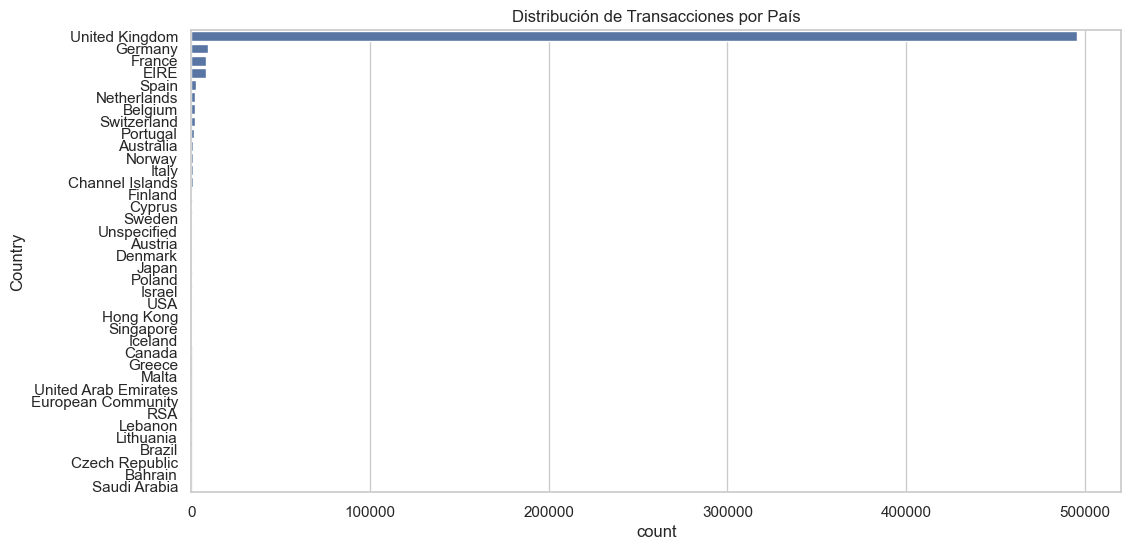

In [10]:
# Distribución de transacciones por país
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Distribución de Transacciones por País')
plt.show()

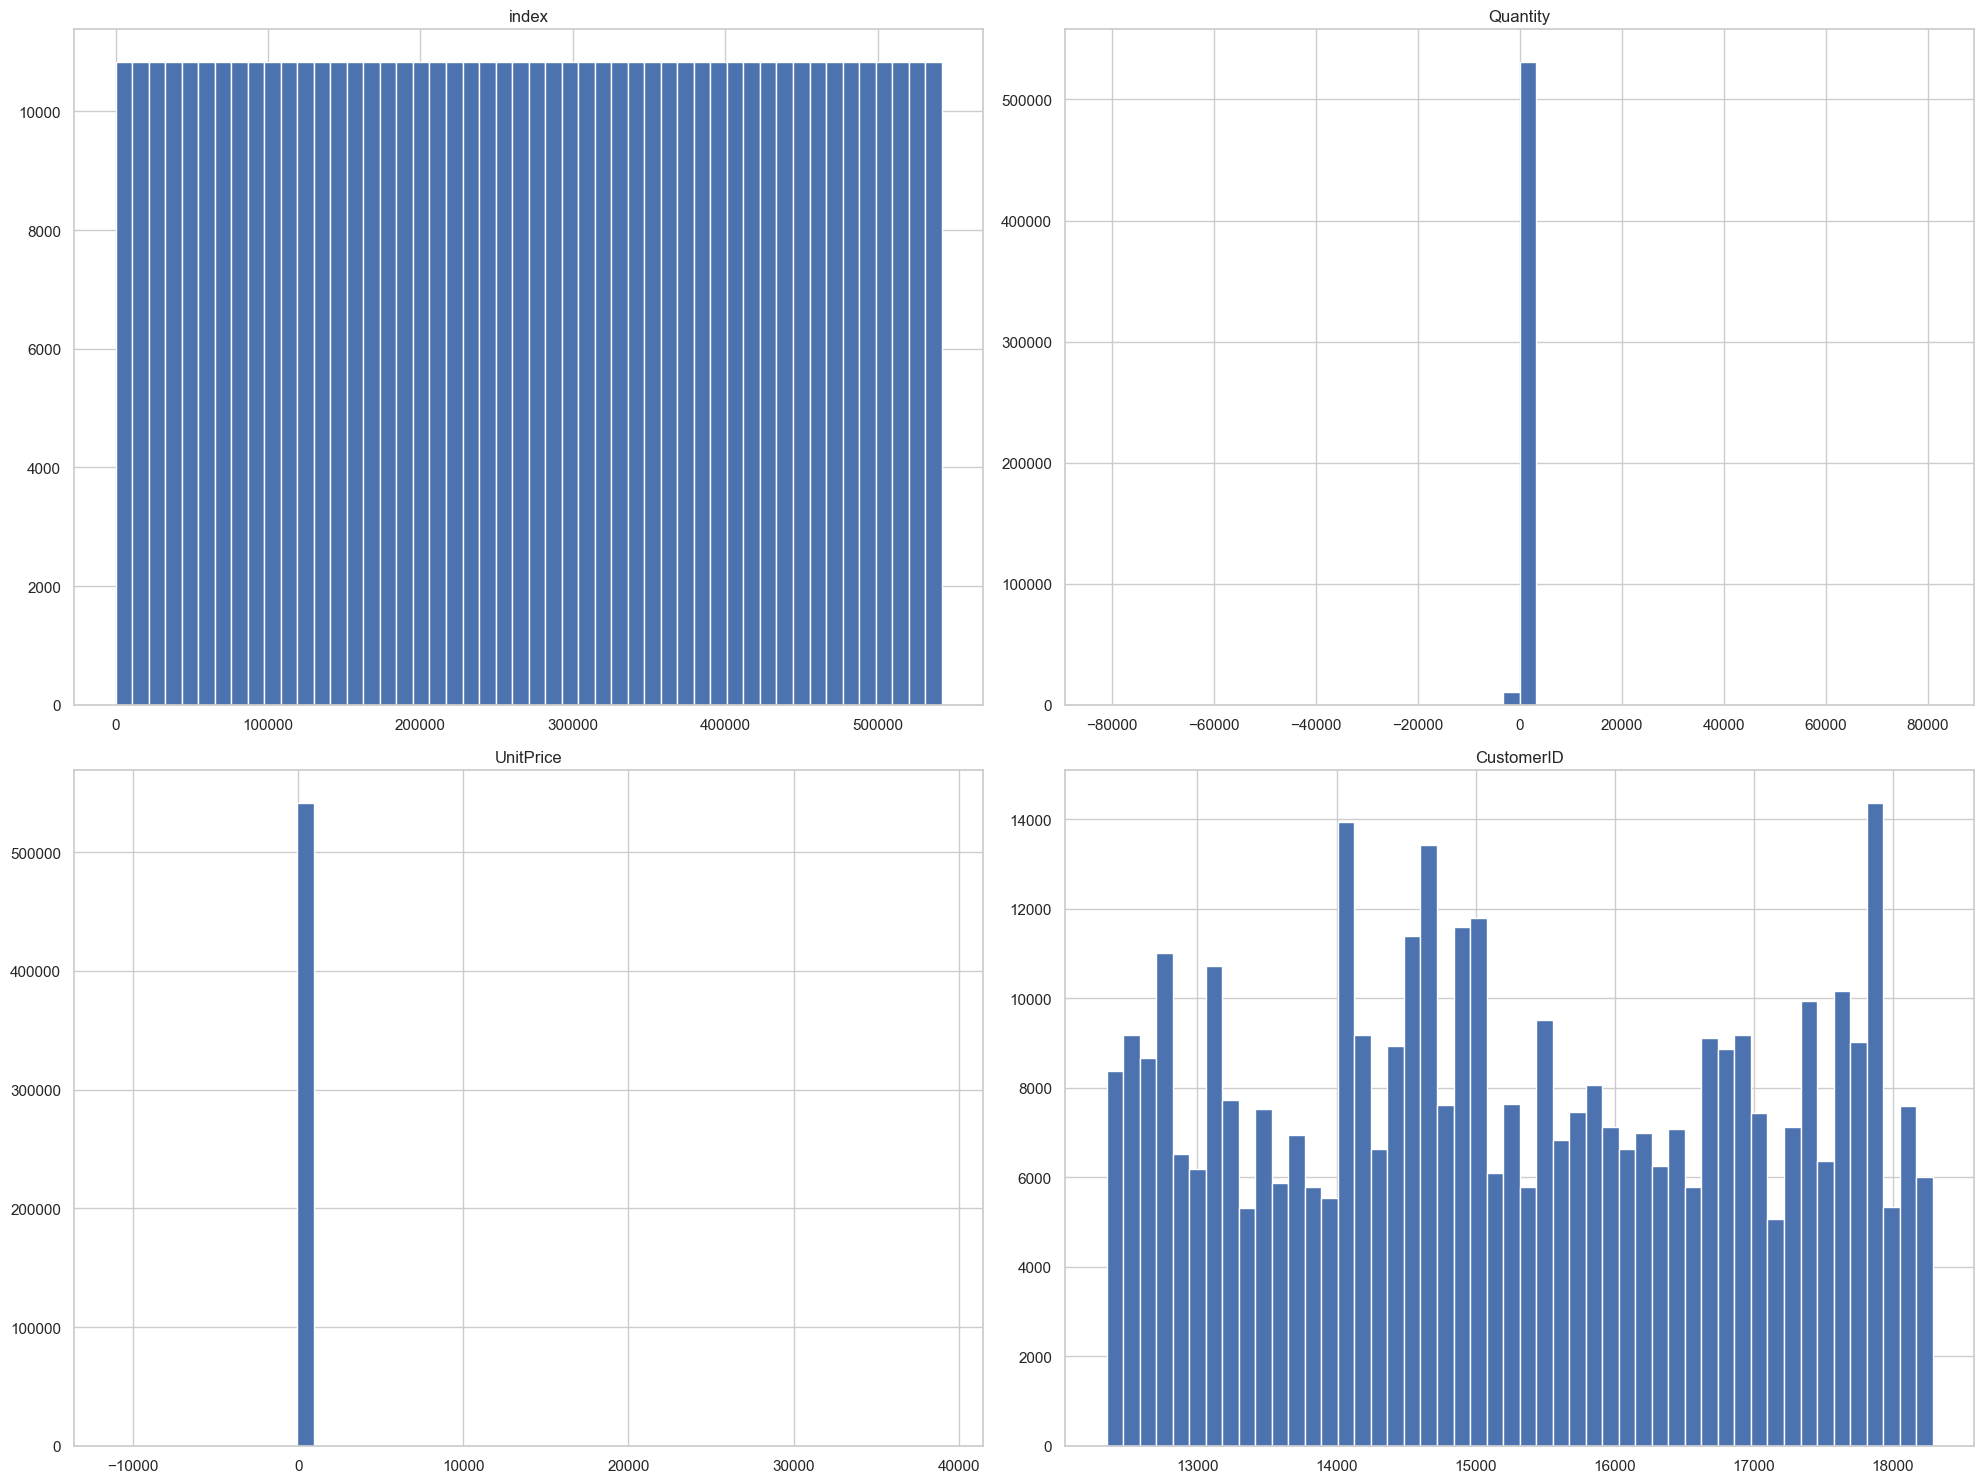

In [11]:
# Histograma de características numéricas
df.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

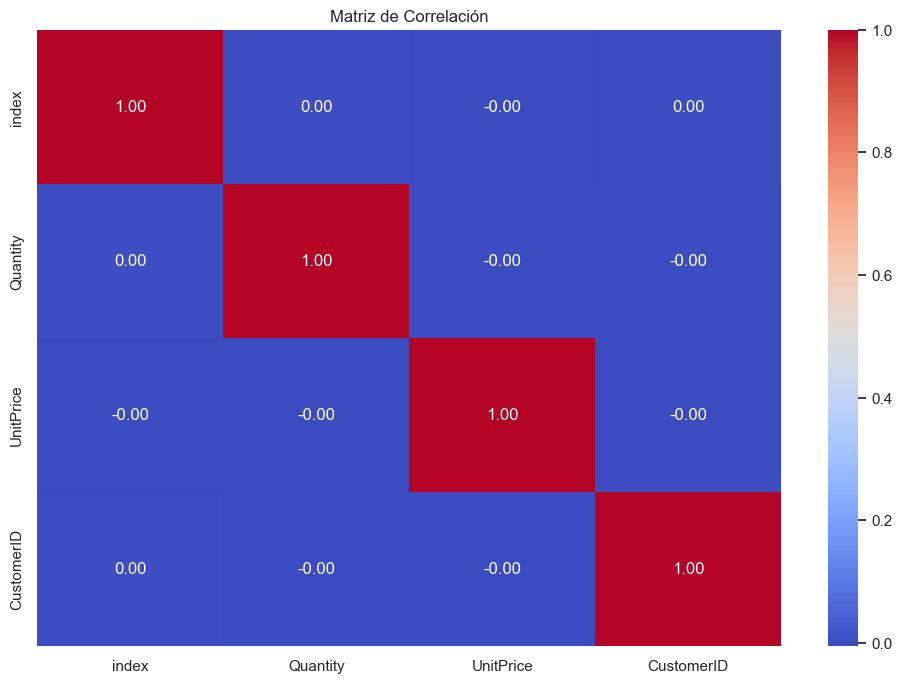

In [12]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Correlación entre características numéricas
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [13]:
# Ejemplo de visualización de patrones de fraude
# Analizar transacciones canceladas
cancelled = df[df['InvoiceNo'].str.startswith('C')]

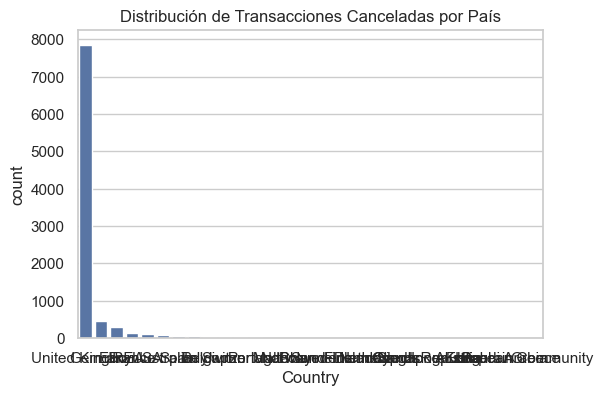

In [14]:
# Distribución de transacciones canceladas
plt.figure(figsize=(6, 4))
sns.countplot(x='Country', data=cancelled, order=cancelled['Country'].value_counts().index)
plt.title('Distribución de Transacciones Canceladas por País')
plt.show()

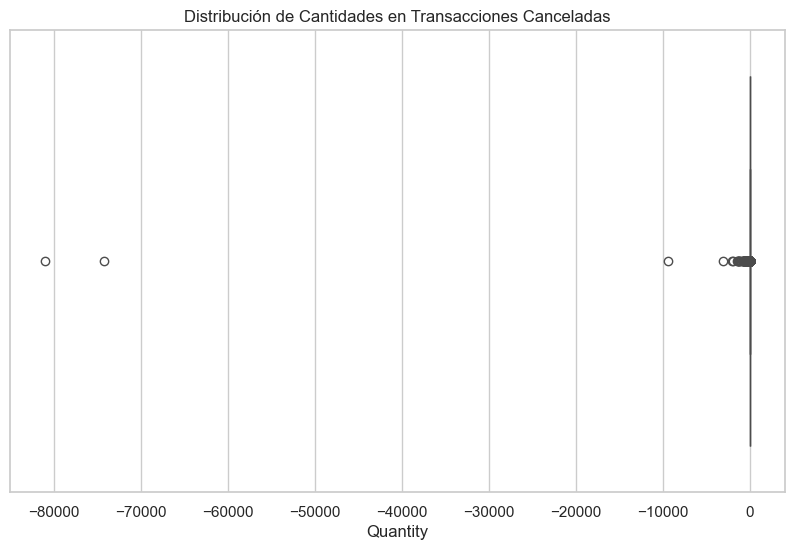

In [15]:
# Distribución de montos de transacciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quantity', data=cancelled)
plt.title('Distribución de Cantidades en Transacciones Canceladas')
plt.show()